<a href="https://colab.research.google.com/github/Cristobalm26/Actividades_EIE401/blob/main/Actividades/Proyectos/Proyecto_1_Cristobal_Moraga_19841682_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 1</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristóbal Antonio Moraga Acosta</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


Debes usar el sitio https://gwosc.org/eventapi/html/GWTC/, donde encuentras todo el catálogo de observaciones con los datos en diferentes formatos. Debes seleccionar una detección para tu estudio y descargar los datos correspondientes (H5 o TXT), lo que posteriormente deberás tratar de manera digital como audio (serie de tiempo).
tip: Te recomiendo tomar la serie de tiempo corta (32 segundos) para facilitar el análisis, y asegurarte de tomar la tasa de muestreo más alta.
tip: Asegúrate de tomar un caso cuyo espectrograma de muestra, indique una señal clara y fuerte para facilitar tu trabajo, de otra forma es posible que no logres aislarla lo suficiente.


## 1. Carga de Datos


Este codigo funciona

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install PyWavelets


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
# Ruta del archivo de texto
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/H-H1_GWOSC_4KHZ_R1-1266645864-32.txt'

with open(ruta_archivo, 'r') as archivo:
    # Ignorar las primeras 3 líneas
    for _ in range(3):
        next(archivo)
    # Leer los datos y convertirlos a flotantes
    datos = [float(linea.strip()) for linea in archivo]


datos = np.array(datos)

## 2. Convertir en audio
Es una forma de validar que tenemos un alto componente de ruido en la señal y que el interés es eliminarlo para encontrar una señal candidata.

Te recomiendo hacer una señal de audio de cada uno de las etapas para así validar como va el proceso. Al final deberás obtener un señal con CHIRP o BUMP. Son sonidos que comprueban que tienes una cantidad de potencia que sobre destaca sobre el ruido.

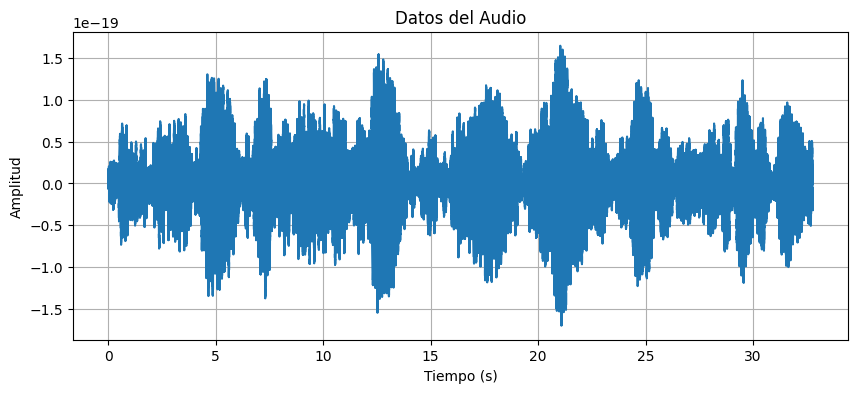

In [ ]:
tiempo = np.arange(len(datos)) / 4000  # La tasa de muestreo es de 4000 Hz

# Grafica de los datos del audio
plt.figure(figsize=(10, 4))
plt.plot(tiempo, datos)
plt.title('Datos del Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

display(Audio(datos[0:1000000000], rate=4000))

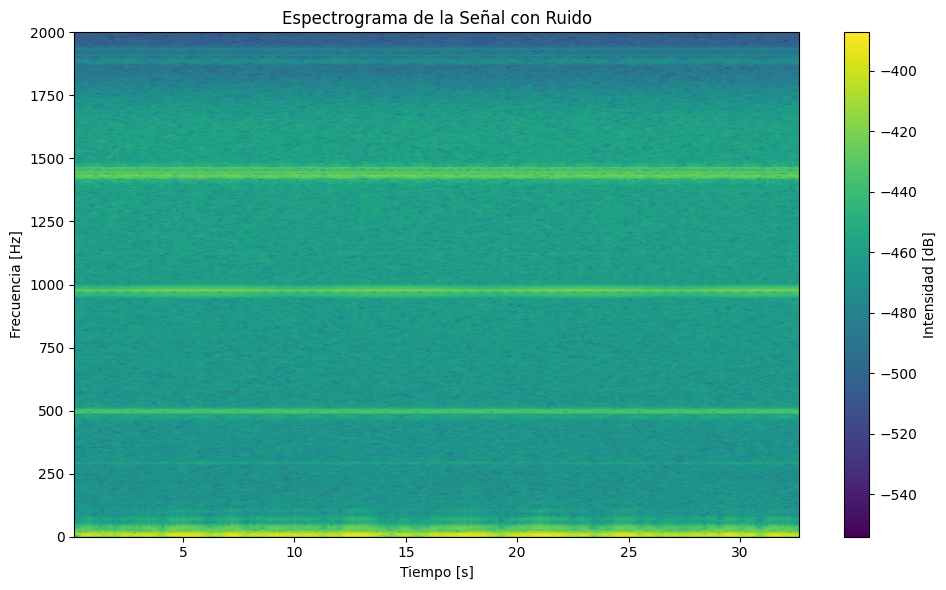

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Parámetros del espectrograma
fs = 4000 # Frecuencia de muestreo
nperseg = 1024  # Longitud de la ventana
noverlap = nperseg // 2  # Solapamiento entre segmentos
nfft = 1024  # Número de puntos de la FFT

# Calculo del espectrograma de la señal con ruido
f_ruido, t_ruido, Sxx_ruido = spectrogram(datos, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Grafico del espectrograma de la señal con ruido
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_ruido, f_ruido, 10 * np.log10(Sxx_ruido), shading='gouraud', cmap='viridis')
plt.title('Espectrograma de la Señal con Ruido')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()


## 3. Análisis de Fourier
Al realizar la conversión, queremos ver cuales son las componentes de ruido que más afectan al instrumento y debemos ignorar en el análisis. Eso se ve como "pico" o la apariencia de "peine".
Se debe presenta la densidad espectral de potencia antes y después de la función de Windowing.


Para analizar las componentes de ruido que afectan a la señal, se utiliza la transformada de Fourier para obtener la densidad espectral de potencia de los datos de audio. La transformada de Fourier entrega una representación de la señal en el dominio de la frecuencia.

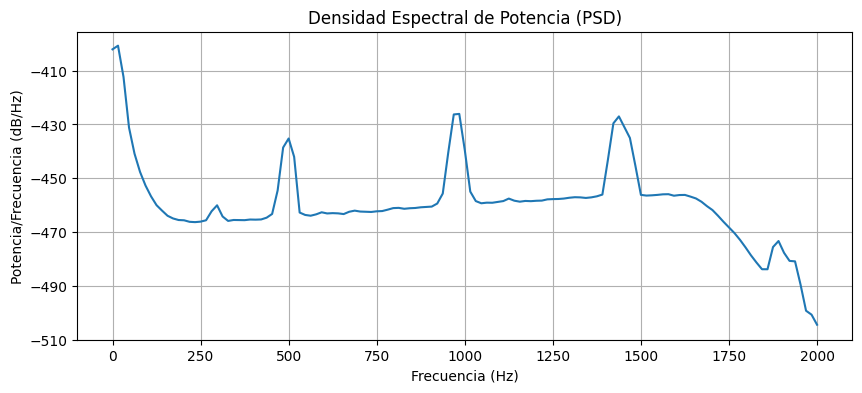

In [ ]:
plt.figure(figsize=(10, 4))
plt.psd(datos, Fs=4000)
plt.title('Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia/Frecuencia (dB/Hz)')
plt.grid(True)

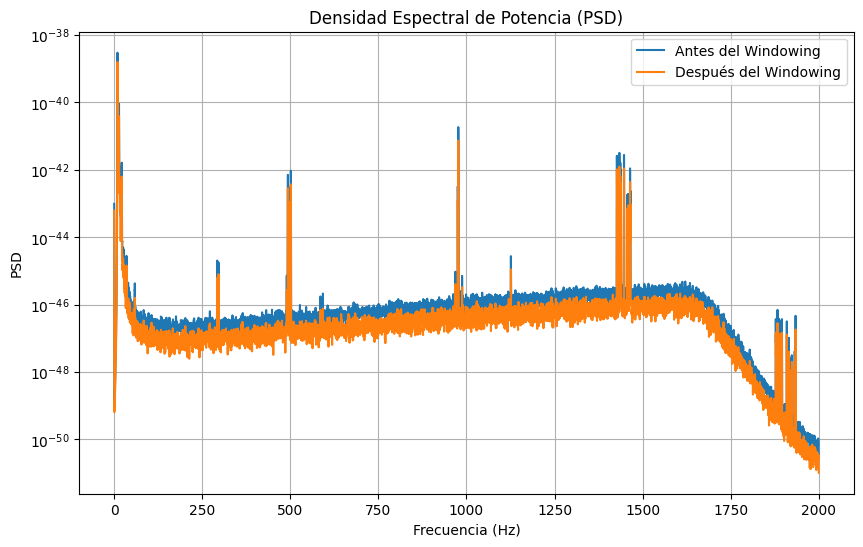

In [ ]:
from scipy.fft import fft
from scipy.signal import welch, windows
import matplotlib.pyplot as plt

# Calculo de la transformada de Fourier de los datos de audio
def calcular_psd(datos, fs):
    fft_resultado = fft(datos)
    # Calcular la PSD usando la función de Welch
    f, psd = welch(datos, fs=fs, window='hann', nperseg=len(datos)//8)
    return f, psd

# Se aplica la función de windowing antes de calcular la PSD
def aplicar_windowing(datos, ventana):
    datos_windowed = datos * ventana
    return datos_windowed

# Calculo de PSD antes de aplicar el windowing
fs = 4000  # Tasa de muestreo
f, psd_before = calcular_psd(datos, fs)

# Se crear una ventana (hanning) para el windowing
ventana = windows.hann(len(datos))

# Se aplica windowing a los datos
datos_windowed = aplicar_windowing(datos, ventana)

# Calculo de la PSD después de aplicar el windowing
f_windowed, psd_after = calcular_psd(datos_windowed, fs)

# Graficos
plt.figure(figsize=(10, 6))
plt.semilogy(f, psd_before, label='Antes del Windowing')
plt.semilogy(f_windowed, psd_after, label='Después del Windowing')
plt.title('Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.show()


Aqui se tiene otra grafica en el dominio de la frecuencia en donde se pueden visualizar los peaks en mayor detalle. Se hizo uso de la funcion de Windowing y la función de Welch.

El windowing es una técnica utilizada en el análisis de señales para reducir el efecto de las discontinuidades alrededor de los bordes de una ventana de datos, lo que puede introducir artefactos no deseados en el análisis espectral, especialmente al calcular la Densidad Espectral de Potencia (PSD).

Algunas diferencias que se observan:

1.-
Reducción de fugas espectrales: La aplicación de windowing reduce la fuga espectral al suavizar los extremos de la ventana de datos. Esto significa que las frecuencias cercanas a los bordes de la ventana tendrán menos influencia en el cálculo de la PSD, lo que puede resultar en una estimación más precisa de la distribución de energía en las frecuencias de interés.

2.- Menor nivel de ruido fuera de banda: El windowing atenúa las componentes de frecuencia fuera de la banda de interés, lo que puede reducir el nivel de ruido en las frecuencias que no son relevantes para el análisis.

3.- Mejora en la resolución espectral: Al reducir el efecto de las discontinuidades en los bordes de la ventana de datos, el windowing puede mejorar la resolución espectral al permitir una estimación más precisa de las características espectrales de la señal.

En resumen, la gráfica con windowing muestra una representación más suave y precisa de la Densidad Espectral de Potencia en comparación con la gráfica sin windowing, especialmente en las frecuencias cercanas a los bordes de la ventana de datos.

La función de Welch es un método para estimar la densidad espectral de potencia (PSD) de una señal utilizando técnicas de promediado y ventana. Es especialmente útil cuando se trabaja con señales estacionarias o cuando se necesita reducir el efecto de la varianza en la estimación de la PSD.

El método de Welch divide la señal en segmentos solapados y calcula la PSD de cada segmento. Luego promedia estas PSD segmentarias para obtener una estimación final de la PSD de la señal completa. Esto ayuda a reducir el efecto de la variabilidad entre los segmentos, lo que puede mejorar la precisión de la estimación de la PSD.

En la función welch() de SciPy, puedes especificar varios parámetros, como la longitud de los segmentos (nperseg), el tipo de ventana utilizada para el promediado (window), el solapamiento entre segmentos (noverlap), entre otros. Estos parámetros te permiten ajustar la precisión y el rendimiento de la estimación de la PSD según las características de tu señal y los requisitos de tu aplicación.

## 4. Procesamiento
Debes inferir de tu estudio, cual es el proceso que aplican a la señal y reproducirlo. Es posible que cada estudiante llegue a una solución más o menos diferente, pues no hay un código abierto donde esté el procedimiento completo.


**Proceso 1**

Este código realiza la eliminación de ruido de una señal de audio utilizando un filtro de media móvil, implementado mediante la función medfilt de la biblioteca SciPy.

Aquí está cómo funciona:

1. Se define una función llamada eliminar_ruido que toma dos argumentos: datos (la señal de audio original) y ventana (el tamaño de la ventana del filtro de media móvil).
   
2. Dentro de esta función, se aplica el filtro de media móvil a la señal de audio utilizando medfilt(datos, ventana). Este filtro calcula el valor medio de los puntos dentro de la ventana especificada y lo asigna al punto central de la ventana. Esto suaviza la señal, eliminando parte del ruido.

3. Se grafica la señal de audio original (datos) junto con la señal sin ruido (datos_sin_ruido) utilizando matplotlib.pyplot.plot(). Esto permite visualizar cómo cambia la señal después de aplicar el filtro de media móvil.

4. Finalmente, se reproduce la señal de audio sin ruido utilizando IPython.display.Audio(), lo que permite escuchar la señal procesada.

El parámetro ventana_filtro determina el tamaño de la ventana del filtro de media móvil. Un valor más grande suavizará más la señal, pero también puede eliminar detalles importantes de la señal.

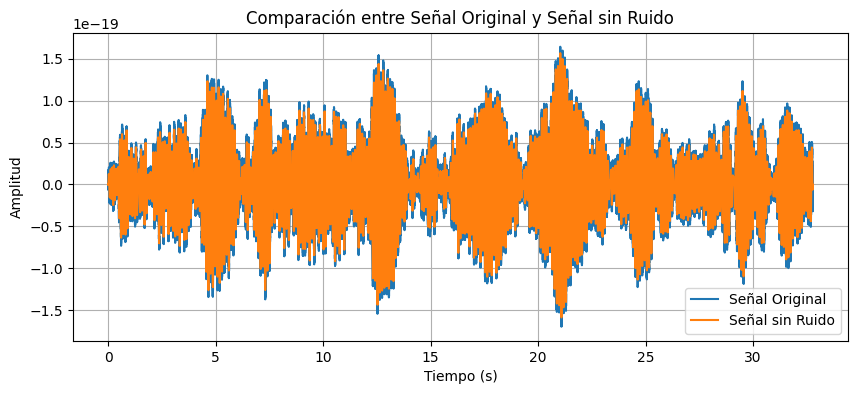

In [ ]:
from scipy.signal import medfilt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Función para eliminar el ruido de la señal de audio
def eliminar_ruido(datos, ventana):
    datos_sin_ruido = medfilt(datos, ventana)
    return datos_sin_ruido

# Ventana para el filtro de media móvil
ventana_filtro = 51 # Tamaño de la ventana del filtro

# Filtro de media móvil para eliminar el ruido de la señal de audio
datos_sin_ruido = eliminar_ruido(datos, ventana_filtro)

# Grafica de la señal de audio original y la señal sin ruido
plt.figure(figsize=(10, 4))
plt.plot(tiempo, datos, label='Señal Original')
plt.plot(tiempo, datos_sin_ruido, label='Señal sin Ruido')
plt.title('Comparación entre Señal Original y Señal sin Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Señal de audio sin ruido
Audio(datos_sin_ruido, rate=4000)


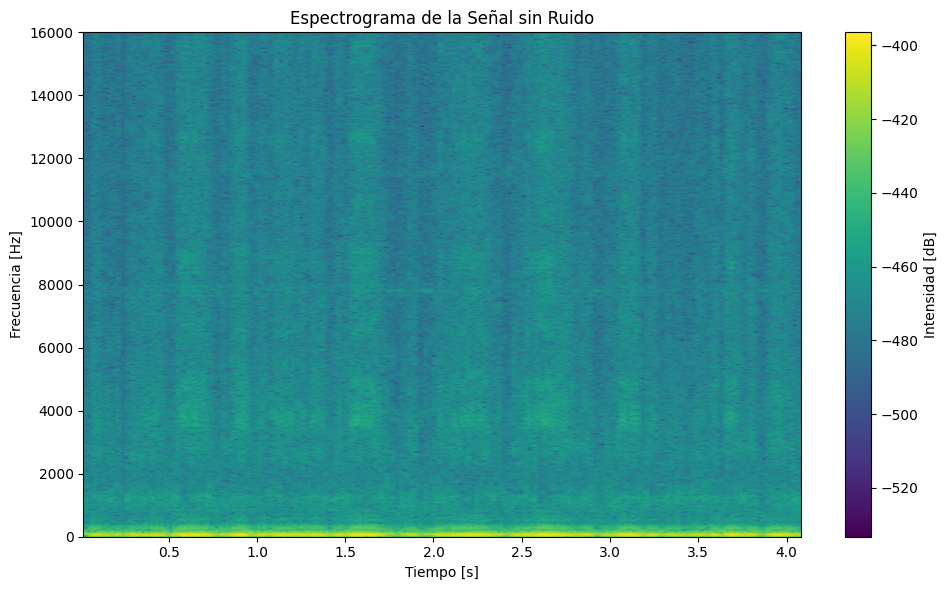

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Parámetros del espectrograma
fs = 32000  # Frecuencia de muestreo
nperseg = 1024  # Longitud de la ventana
noverlap = nperseg // 2  # Solapamiento entre segmentos
nfft = 1024  # Número de puntos de la FFT

# Calculo del espectrograma
f, t, Sxx = spectrogram(datos_sin_ruido, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Grafica del espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.title('Espectrograma de la Señal sin Ruido')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()

En general, aumentar el tamaño de la ventana del filtro de media móvil puede ayudar a reducir el ruido en la señal. La idea detrás de esto es que al aumentar el tamaño de la ventana, se termina promediando más puntos de la señal en cada punto de salida del filtro, lo que puede suavizar aún más la señal y eliminar el ruido.

Sin embargo, es importante tener en cuenta que aumentar demasiado el tamaño de la ventana puede tener efectos no deseados, como suavizar demasiado la señal y borrar características importantes o detalles importantes.

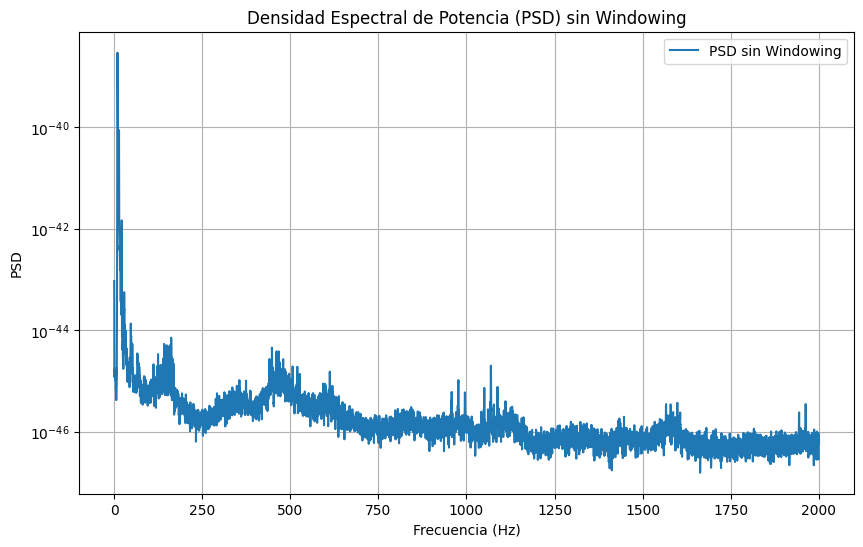

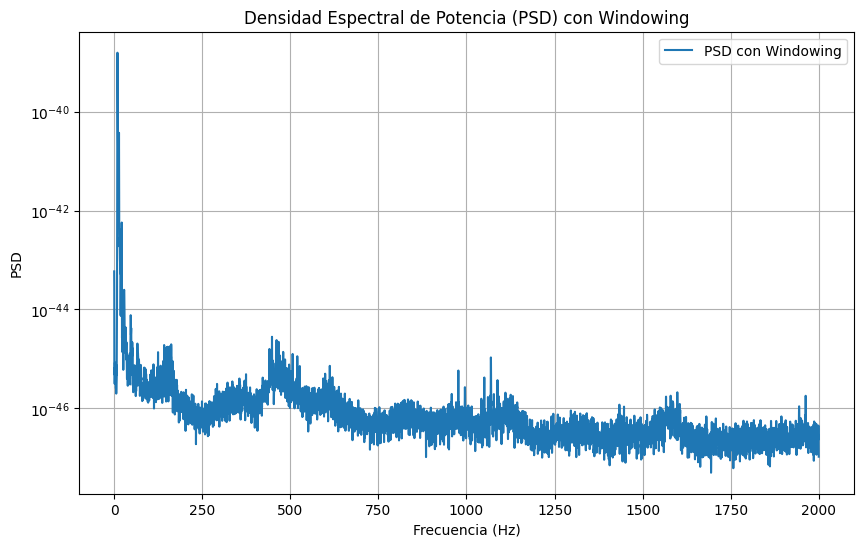

In [ ]:
from scipy.signal import welch, windows
import matplotlib.pyplot as plt

# Calculo de la PSD usando la función de Welch con windowing
def calcular_psd_windowing(datos, fs):
    # Ventana para el windowing
    ventana = windows.hann(len(datos))

    # Windowing a los datos
    datos_windowed = datos * ventana

    # Calculo de la PSD usando la función de Welch
    f, psd = welch(datos_windowed, fs=fs, window='hann', nperseg=len(datos)//8)

    return f, psd

# Calculo de la PSD usando la función de Welch sin windowing
def calcular_psd_welch(datos, fs):
    f, psd = welch(datos, fs=fs, window='hann', nperseg=len(datos)//8)
    return f, psd

# Tasa de muestreo
fs = 4000

# Calculo de la PSD con windowing
f_windowing, psd_windowing = calcular_psd_windowing(datos_sin_ruido, fs)

# Calculo de la PSD sin windowing
f_welch, psd_welch = calcular_psd_welch(datos_sin_ruido, fs)

# Grafica de la PSD sin windowing
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, psd_welch, label='PSD sin Windowing')
plt.title('Densidad Espectral de Potencia (PSD) sin Windowing')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.show()
# Grafica de la PSD con windowing
plt.figure(figsize=(10, 6))
plt.semilogy(f_windowing, psd_windowing, label='PSD con Windowing')
plt.title('Densidad Espectral de Potencia (PSD) con Windowing')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.show()





En este caso una ventana de filtro de 51 hace que la PSD no tenga peaks tan altos, sin embargo se pierde mucha informacion.

**Proceso 2**

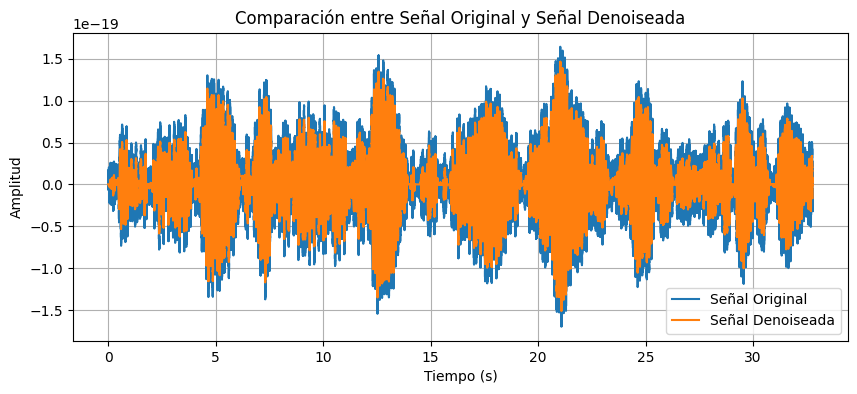

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

fs_original=4000
# Función denoising wavelet
def denoise_wavelet(datos, wavelet='db4', level=1):
    # Aplicar descomposición en wavelet
    coeffs = pywt.wavedec(datos, wavelet, level=level)

    # Umbral suave (soft thresholding) para denoising
    threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(datos)))
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

    # Reconstruccion de la señal denoiseada
    datos_denoised = pywt.waverec(coeffs, wavelet)

    return datos_denoised

# Denoising wavelet a los datos de audio
datos_denoised = denoise_wavelet(datos)

# Grafica de la señal original y la señal denoiseada
plt.figure(figsize=(10, 4))
plt.plot(tiempo, datos, label='Señal Original')
plt.plot(tiempo, datos_denoised, label='Señal Denoiseada')
plt.title('Comparación entre Señal Original y Señal Denoiseada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Señal denoiseada
Audio(datos_denoised, rate=fs_original)


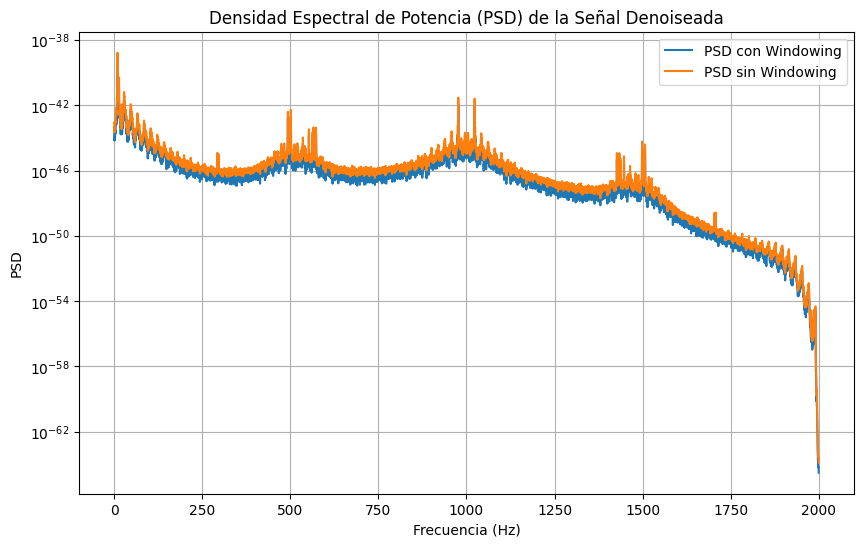

In [ ]:
from scipy.signal import welch, windows
import matplotlib.pyplot as plt

# Calculo de la PSD usando la función de Welch con windowing
def calcular_psd_windowing(datos, fs):
    # Ventana para el windowing
    ventana = windows.hann(len(datos))

    # Aplicando windowing a los datos
    datos_windowed = datos * ventana

    # Calculo de la PSD usando la función de Welch
    f, psd = welch(datos_windowed, fs=fs, window='hann', nperseg=len(datos)//8)

    return f, psd

# Calculo de la PSD usando la función de Welch sin windowing
def calcular_psd_welch(datos, fs):
    f, psd = welch(datos, fs=fs, window='hann', nperseg=len(datos)//8)
    return f, psd

# Tasa de muestreo
fs = 4000

# Calculo de la PSD con windowing
f_windowing, psd_windowing = calcular_psd_windowing(datos_denoised, fs)

# Calculo de la PSD sin windowing
f_welch, psd_welch = calcular_psd_welch(datos_denoised, fs)

# Grafica de la PSD con y sin windowing
plt.figure(figsize=(10, 6))
plt.semilogy(f_windowing, psd_windowing, label='PSD con Windowing')
plt.semilogy(f_welch, psd_welch, label='PSD sin Windowing')
plt.title('Densidad Espectral de Potencia (PSD) de la Señal Denoiseada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.show()


En este proceso claramente bajo harto los peaks de la PSD.

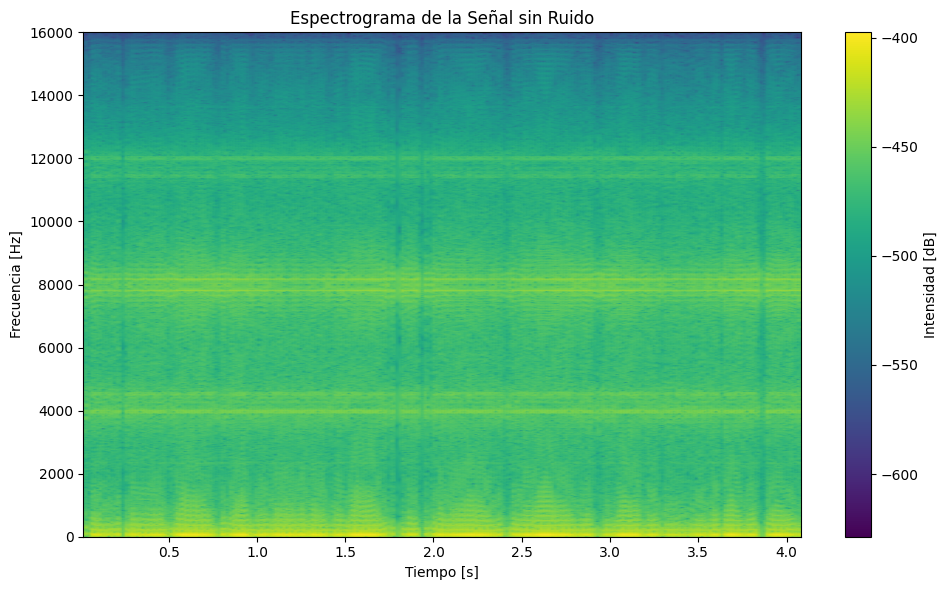

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Parámetros del espectrograma
fs = 32000  # Frecuencia de muestreo
nperseg = 1024  # Longitud de la ventana
noverlap = nperseg // 2  # Solapamiento entre segmentos
nfft = 1024  # Número de puntos de la FFT

# Calculo del espectrograma
f, t, Sxx = spectrogram(datos_denoised, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Grafica del espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.title('Espectrograma de la Señal sin Ruido')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()

**Proceso 3**

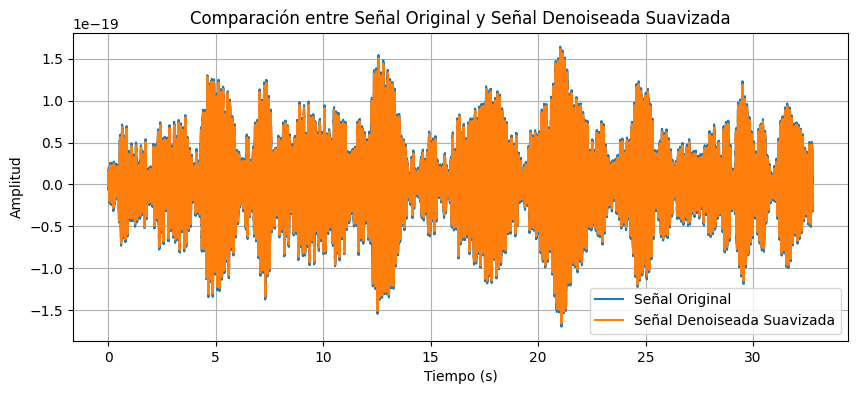

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


fs_original= 4000
# Función denoising wavelet con umbral ajustable
def denoise_wavelet(datos, wavelet='db4', level=1, umbral_multiplicador=1):
    # Descomposición en wavelet
    coeffs = pywt.wavedec(datos, wavelet, level=level)

    # Calculop del umbral basado en la desviación estándar de los coeficientes
    threshold = umbral_multiplicador * np.std(coeffs[-1])

    # Umbral suave (soft thresholding) para denoising
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

    # Reconstruccion de la señal denoiseada
    datos_denoised = pywt.waverec(coeffs, wavelet)

    return datos_denoised

# Denoising wavelet con umbral ajustable a los datos de audio
umbral_multiplicador = 0.5  # Ajustar el umbral multiplicador según sea necesario
datos_denoised_suavizado = denoise_wavelet(datos, umbral_multiplicador=umbral_multiplicador)

# Grafica de la señal original y la señal denoiseada suavizada
plt.figure(figsize=(10, 4))
plt.plot(tiempo, datos, label='Señal Original')
plt.plot(tiempo, datos_denoised_suavizado, label='Señal Denoiseada Suavizada')
plt.title('Comparación entre Señal Original y Señal Denoiseada Suavizada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Señal denoiseada suavizada
Audio(datos_denoised_suavizado, rate=fs_original)

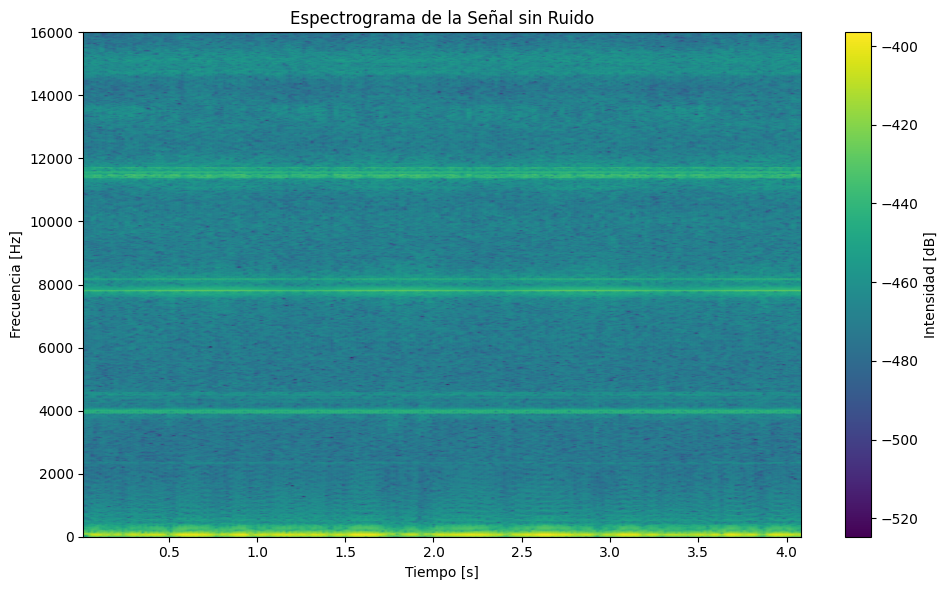

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Parámetros del espectrograma
fs = 32000  # Frecuencia de muestreo
nperseg = 1024  # Longitud de la ventana
noverlap = nperseg // 2  # Solapamiento entre segmentos
nfft = 1024  # Número de puntos de la FFT

# Calculo  del espectrograma
f, t, Sxx = spectrogram(datos_denoised_suavizado, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Grafica del espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.title('Espectrograma de la Señal sin Ruido')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()

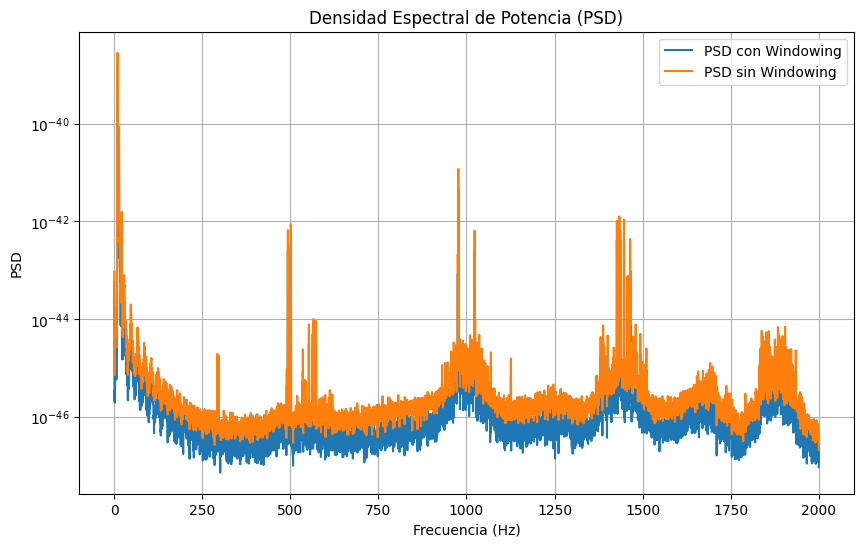

In [ ]:
from scipy.signal import welch, windows
import matplotlib.pyplot as plt

# Calculo de la PSD usando la función de Welch con windowing
def calcular_psd_windowing(datos, fs):
    # Ventana para el windowing
    ventana = windows.hann(len(datos))

    # Windowing a los datos
    datos_windowed = datos * ventana

    # Calculo de la PSD usando la función de Welch
    f, psd = welch(datos_windowed, fs=fs, window='hann', nperseg=len(datos)//8)

    return f, psd

# Calculo de la PSD usando la función de Welch sin windowing
def calcular_psd_welch(datos, fs):
    f, psd = welch(datos, fs=fs, window='hann', nperseg=len(datos)//8)
    return f, psd

# Tasa de muestreo
fs = 4000

# Calculo de la PSD con windowing
f_windowing, psd_windowing = calcular_psd_windowing(datos_denoised_suavizado, fs)

# Calculo de la PSD sin windowing
f_welch, psd_welch = calcular_psd_welch(datos_denoised_suavizado, fs)

# Grafica de la PSD con y sin windowing
plt.figure(figsize=(10, 6))
plt.semilogy(f_windowing, psd_windowing, label='PSD con Windowing')
plt.semilogy(f_welch, psd_welch, label='PSD sin Windowing')
plt.title('Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.show()

# Resampling
Para lograr una mejor definición de la señal, se debe hacer un resampleo. Esto tienen consecuencias por eso debe elegirse bien la frecuencia de tal forma que no se introduzca ruido.

usar 32K

In [ ]:

from scipy.signal import resample
import numpy as np
from IPython.display import Audio

# Definir la función para el resampleo
def resamplear_datos(datos, fs_original, fs_nueva):
    # Calculo de la longitud de los datos resampleados
    n_nuevo = int(len(datos) * fs_nueva / fs_original)
    # Resamplear los datos
    datos_resampleados = resample(datos, n_nuevo)
    return datos_resampleados

# Ruta
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/H-H1_GWOSC_4KHZ_R1-1266645864-32.txt'

# Leer los datos del archivo
with open(ruta_archivo, 'r') as archivo:
    # Ignorar las primeras 3 líneas
    for _ in range(3):
        next(archivo)
    # Leer los datos y convertirlos a flotantes
    datos = [float(linea.strip()) for linea in archivo]

datos = np.array(datos)
fs_original = 4000  # Tasa de muestreo original
fs_nueva = 32000  # Nueva tasa de muestreo deseada

# Resampleo de los datos
datos_resampleados = resamplear_datos(datos, fs_original, fs_nueva)

# Reproducir el audio después del resampleo
display(Audio(datos_resampleados, rate=fs_nueva))
print(fs_nueva)



32000


Al resamplear los datos de audio a una frecuencia de muestreo más alta (en este caso, de 4 kHz a 32 kHz), se pueden obtener varias conclusiones importantes:

1. **Mejora en la calidad del audio**: Al aumentar la frecuencia de muestreo, se incrementa la resolución temporal de la señal, lo que resulta en una mejora en la calidad general del audio.

2. **Mayor información en el dominio de la frecuencia**: Una frecuencia de muestreo más alta permite una representación más detallada de las frecuencias presentes en la señal. Esto es útil para identificar componentes de frecuencia de alta resolución, como armónicos o detalles sutiles en la señal.

3. **Requerimientos de almacenamiento y procesamiento**: Sin embargo, es importante tener en cuenta que el aumento en la frecuencia de muestreo también conlleva mayores requerimientos de almacenamiento y procesamiento. Los datos resampleados ocupan más espacio en memoria y requieren más tiempo de procesamiento para análisis posteriores.

4. **Cuidado con el aliasing**: Al realizar el resampleo a una frecuencia de muestreo más alta, es esencial asegurarse de que no se introduzca aliasing. Esto ocurre cuando las frecuencias presentes en la señal original superan la mitad de la nueva frecuencia de muestreo. Se deben tomar medidas para filtrar las frecuencias no deseadas antes del resampleo para evitar el aliasing.

En resumen, el resampleo de datos de audio a una frecuencia de muestreo más alta puede mejorar la calidad y la resolución de la señal, pero también conlleva consideraciones adicionales en términos de almacenamiento, procesamiento y la necesidad de evitar el aliasing.

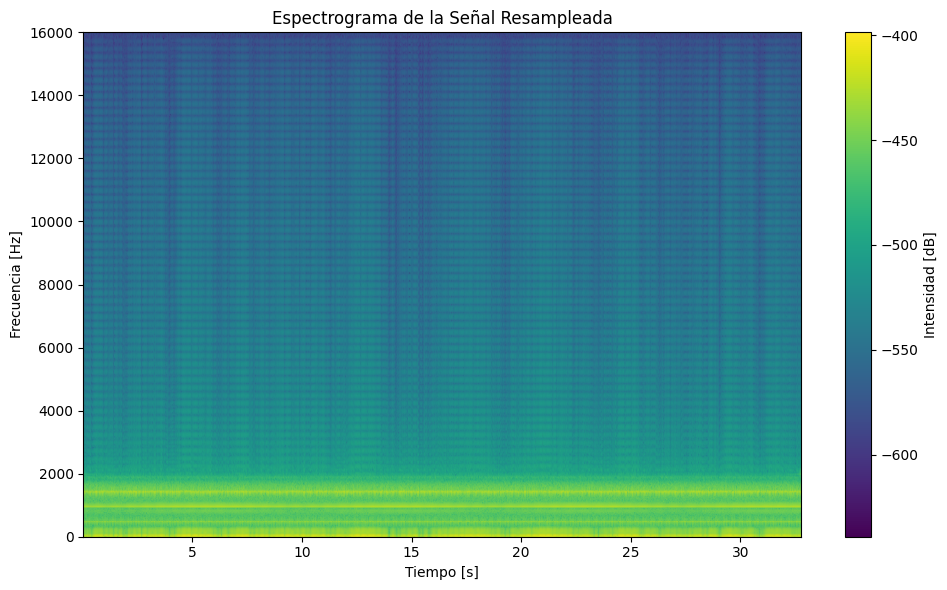

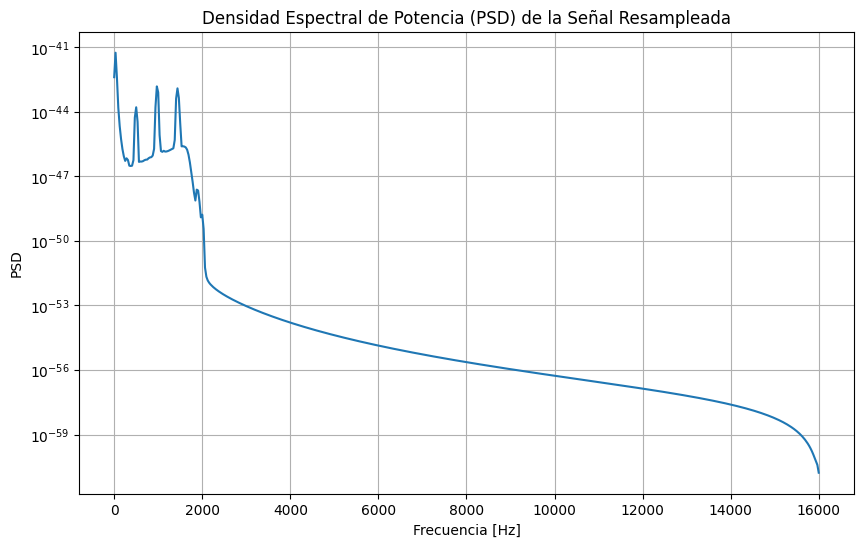

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch

def calcular_espectrograma_y_psd(datos, fs):
    # Parámetros del espectrograma
    nperseg = 1024  # Longitud de la ventana
    noverlap = nperseg // 2  # Solapamiento entre segmentos
    nfft = 1024  # Número de puntos de la FFT

    # Calculo de el espectrograma
    f_spec, t_spec, Sxx = spectrogram(datos, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

    # Calculo de la PSD
    f_psd, psd = welch(datos, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, nfft=nfft)

    return f_spec, t_spec, Sxx, f_psd, psd

# Calculo de espectrograma y PSD de los datos resampleados
f_spec_resampleado, t_spec_resampleado, Sxx_resampleado, f_psd_resampleado, psd_resampleado = calcular_espectrograma_y_psd(datos_resampleados, fs_nueva)

# Grafica de espectograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec_resampleado, f_spec_resampleado, 10 * np.log10(Sxx_resampleado), shading='gouraud', cmap='viridis')
plt.title('Espectrograma de la Señal Resampleada')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()

# Grafica de la PSD
plt.figure(figsize=(10, 6))
plt.semilogy(f_psd_resampleado, psd_resampleado)
plt.title('Densidad Espectral de Potencia (PSD) de la Señal Resampleada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid(True)
plt.show()
